<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

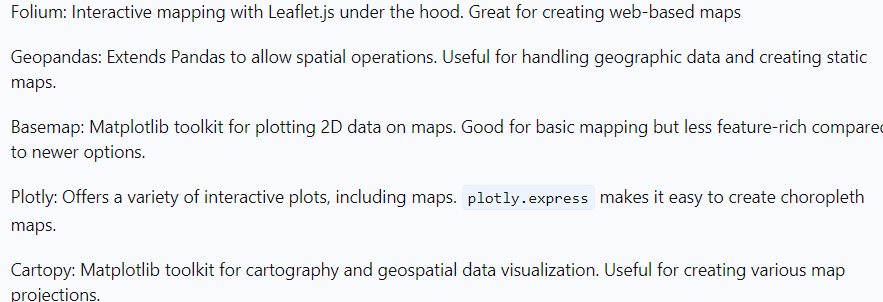

## Dataset Loading

In [330]:
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [331]:
df = pd.read_csv(Belga_0711_url)

In [332]:
df.sample(10)

,id,driver,datePH,longitude,latitude,altitude,gpsSpeed,timeStamp,calEngineLoad,vehSpeed,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
57210,64ad4253c83e0735d6c64ef3,Roly Belga,20230711,121.028302,14.550112,0,0,2023-07-11T11:51:46.000+0000,47,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30803,64acdd6b0e0d0c223db16808,Roly Belga,20230711,120.998592,14.537597,8,0,2023-07-11T04:41:14.000+0000,41,0,...,50.00,8.85,12.0,41.0,14.0,28421.0,1.0,2.0,43.0,0.0
37637,64acf795daa2b1535bd3ae8d,Roly Belga,20230711,121.018750,14.657570,27,26,2023-07-11T06:32:51.000+0000,0,25,...,61.70,11.67,14.0,32.0,51.0,34576.0,1.0,2.0,35.0,0.0
40263,64ad01b200c2135d398421ee,Roly Belga,20230711,121.029698,14.550910,28,12,2023-07-11T07:15:59.000+0000,0,14,...,67.52,4.70,15.0,15.0,59.0,37053.0,1.0,2.0,16.0,0.0
41018,64ad04b238434d63e8682629,Roly Belga,20230711,121.004545,14.538182,-11,0,2023-07-11T07:28:46.000+0000,36,0,...,50.30,8.20,15.0,28.0,46.0,37815.0,1.0,2.0,18.0,0.0
17039,64aca37331c1264f18051ef9,Roly Belga,20230711,121.028430,14.549290,24,0,2023-07-11T00:33:53.000+0000,54,2,...,76.30,3.90,8.0,33.0,53.0,15610.0,1.0,2.0,29.0,0.0
21784,64acb58b98f21970f46256d8,Roly Belga,20230711,120.986348,14.657260,32,0,2023-07-11T01:51:06.000+0000,61,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37424,64acf6c1a40c634e7bda455e,Roly Belga,20230711,121.010778,14.657467,42,14,2023-07-11T06:29:18.000+0000,0,15,...,90.24,6.56,14.0,29.0,18.0,34365.0,1.0,2.0,35.0,0.0
39813,64acffef00c2135d398419e1,Roly Belga,20230711,121.045955,14.569060,22,0,2023-07-11T07:08:29.000+0000,23,0,...,57.50,11.19,15.0,8.0,29.0,36605.0,1.0,2.0,16.0,0.0
41913,64ad0a5d2ad737690bb22caa,Roly Belga,20230711,120.989735,14.536325,-10,11,2023-07-11T07:45:27.000+0000,54,10,...,48.20,5.61,15.0,45.0,27.0,38810.0,1.0,2.0,15.0,0.0


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59962 non-null  object 
 1   driver               59962 non-null  object 
 2   datePH               59962 non-null  int64  
 3   longitude            59962 non-null  float64
 4   latitude             59962 non-null  float64
 5   altitude             59962 non-null  int64  
 6   gpsSpeed             59962 non-null  int64  
 7   timeStamp            59962 non-null  object 
 8   calEngineLoad        59962 non-null  int64  
 9   vehSpeed             59962 non-null  int64  
 10  throttlePosition     59962 non-null  int64  
 11  ambientAirTemp       59962 non-null  int64  
 12  engineOilTemp        59962 non-null  int64  
 13  Speed                59962 non-null  int64  
 14  fuelPressure         59962 non-null  int64  
 15  engineRPM            59962 non-null 

In [334]:
df.describe()

,datePH,longitude,latitude,altitude,gpsSpeed,calEngineLoad,vehSpeed,throttlePosition,ambientAirTemp,engineOilTemp,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
count,59962.0,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,...,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000
mean,20230711.0,121.015852,14.582620,31.943781,12.439695,40.623378,13.531353,16.221574,31.234882,91.116074,...,68.544674,7.283566,11.684256,29.035984,29.508439,27089.408954,1.032799,1.976042,38.653255,0.000468
std,0.0,0.024735,0.054249,18.870216,16.248403,22.730954,16.755636,26.054464,2.799451,2.627240,...,18.453354,8.305447,4.872378,16.987965,17.326651,15347.426785,0.178113,0.152920,16.971604,0.154785
min,20230711.0,120.983452,14.507295,-157.000000,0.000000,0.000000,0.000000,0.000000,27.000000,86.000000,...,-168.810000,2.150000,4.000000,0.000000,0.000000,532.000000,1.000000,1.000000,7.000000,-1.000000
25%,20230711.0,120.991318,14.537463,18.000000,0.000000,31.000000,0.000000,0.000000,29.000000,89.000000,...,55.800000,3.900000,8.000000,15.000000,15.000000,13775.000000,1.000000,2.000000,26.000000,0.000000
50%,20230711.0,121.009363,14.564530,31.000000,0.000000,41.000000,4.000000,0.000000,31.000000,91.000000,...,65.500000,4.250000,12.000000,29.000000,30.000000,27057.000000,1.000000,2.000000,35.000000,0.000000
75%,20230711.0,121.039225,14.644352,46.000000,27.000000,51.000000,28.000000,30.000000,34.000000,93.000000,...,81.000000,9.030000,16.000000,44.000000,45.000000,40396.000000,1.000000,2.000000,53.000000,0.000000
max,20230711.0,121.059888,14.657928,120.000000,62.000000,100.000000,65.000000,100.000000,39.000000,100.000000,...,309.660000,335.900000,20.000000,59.000000,59.000000,53641.000000,2.000000,2.000000,85.000000,1.000000


In [335]:
df.isnull().sum()

,0
id,0
driver,0
datePH,0
longitude,0
latitude,0
altitude,0
gpsSpeed,0
timeStamp,0
calEngineLoad,0
vehSpeed,0


In [336]:
df.duplicated().sum()

0

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59962 non-null  object 
 1   driver               59962 non-null  object 
 2   datePH               59962 non-null  int64  
 3   longitude            59962 non-null  float64
 4   latitude             59962 non-null  float64
 5   altitude             59962 non-null  int64  
 6   gpsSpeed             59962 non-null  int64  
 7   timeStamp            59962 non-null  object 
 8   calEngineLoad        59962 non-null  int64  
 9   vehSpeed             59962 non-null  int64  
 10  throttlePosition     59962 non-null  int64  
 11  ambientAirTemp       59962 non-null  int64  
 12  engineOilTemp        59962 non-null  int64  
 13  Speed                59962 non-null  int64  
 14  fuelPressure         59962 non-null  int64  
 15  engineRPM            59962 non-null 

In [338]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())

id
['64ac640d8311b05aa142074b' '64ac640d8311b05aa142074a'
 '64ac640b8311b05aa1420746' ... '64ad4cb286571b3fe57f55a6'
 '64ad4cb286571b3fe57f55a5' '64ad4cb286571b3fe57f55a4']
driver
['Roly Belga']
datePH
[20230711]
longitude
[120.98904   120.98889   120.988825  ... 120.9916666 120.9916683
 120.9917116]
latitude
[14.5079683 14.5079516 14.5079383 ... 14.5108599 14.5108633 14.5109583]
altitude
[ -18  -34  -40  -39  -38  -37  -36  -35  -33  -31  -30  -29  -28  -27
  -26  -25  -23  -12  -11  -10   -9   -8   -7   -6   -5   -4   -2   -1
    0    1    2    3    4    5    6   13   14   15    9   10   11   12
   16    7    8   19   18   20   21   22   17   23   25   27   28   30
   31   33   37   41   43   47   49   50   52   54   55   56   53   57
   51   48   46   42   40   38   35   32   29   26   24   36   34   39
   44   45   59   60   64   65   66   63   62   61   58   69   72   71
   70   67   68   94   73   74   75   76   77   78   79   80   82   83
   84   86   87   85   -3  103  105  106

In [339]:
df.drop(columns = ['id','driver', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',
                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',
                   'Speed', 'fuelPressure', 'engineRPM', 'engineOilTemp',
                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',
                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',
                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',
                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)

In [340]:
df.sample(10)

,datePH,longitude,latitude,timestamp,Board,Alight,Numpass,Time,Hour,Min,Sec
40584,20230711,121.009422,14.538672,2023-07-11 15:21:34,False,False,4.0,15:21:34,15.0,21.0,34.0
32467,20230711,121.045787,14.567350,2023-07-11 13:08:33,False,False,14.0,13:08:33,13.0,8.0,33.0
4019,20230711,121.056050,14.608833,2023-07-11 05:05:37,False,False,53.0,05:05:37,5.0,5.0,37.0
36546,20230711,120.987095,14.657172,2023-07-11 14:15:04,False,False,0.0,14:15:04,14.0,15.0,4.0
2747,20230711,121.029072,14.549865,2023-07-11 04:45:05,False,False,54.0,04:45:05,4.0,45.0,5.0
47117,20230711,121.015702,14.539850,2023-07-11 17:08:35,False,False,15.0,17:08:35,17.0,8.0,35.0
31401,20230711,120.999622,14.537512,2023-07-11 12:51:00,True,False,27.0,12:51:00,12.0,51.0,0.0
34314,20230711,121.033432,14.650818,2023-07-11 13:38:51,False,False,24.0,13:38:51,13.0,38.0,51.0
35328,20230711,120.999682,14.657457,2023-07-11 13:55:04,False,False,18.0,13:55:04,13.0,55.0,4.0
57065,20230711,121.028430,14.550000,2023-07-11 19:49:27,False,False,33.0,19:49:27,19.0,49.0,27.0


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datePH     59962 non-null  int64  
 1   longitude  59962 non-null  float64
 2   latitude   59962 non-null  float64
 3   timestamp  59958 non-null  object 
 4   Board      53385 non-null  object 
 5   Alight     53385 non-null  object 
 6   Numpass    53385 non-null  float64
 7   Time       53385 non-null  object 
 8   Hour       53385 non-null  float64
 9   Min        53385 non-null  float64
 10  Sec        53385 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.0+ MB


In [342]:
df.dropna(inplace = True)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datePH     53385 non-null  int64  
 1   longitude  53385 non-null  float64
 2   latitude   53385 non-null  float64
 3   timestamp  53385 non-null  object 
 4   Board      53385 non-null  object 
 5   Alight     53385 non-null  object 
 6   Numpass    53385 non-null  float64
 7   Time       53385 non-null  object 
 8   Hour       53385 non-null  float64
 9   Min        53385 non-null  float64
 10  Sec        53385 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 4.9+ MB


In [344]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [345]:
df[df['Board']==True]

,datePH,longitude,latitude,timestamp,Board,Alight,Numpass,Time,Hour,Min,Sec,stop_cluster
18,20230711,120.988783,14.507963,2023-07-11 04:01:13,True,False,15.0,04:01:13,4.0,1.0,13.0,18
28,20230711,120.988768,14.507970,2023-07-11 04:01:22,True,False,16.0,04:01:22,4.0,1.0,22.0,18
312,20230711,120.990620,14.524773,2023-07-11 04:05:48,True,False,16.0,04:05:48,4.0,5.0,48.0,6
504,20230711,120.988995,14.535418,2023-07-11 04:08:44,True,False,16.0,04:08:44,4.0,8.0,44.0,19
524,20230711,120.988997,14.535923,2023-07-11 04:09:03,True,False,17.0,04:09:03,4.0,9.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
57421,20230711,121.028302,14.550112,2023-07-11 19:55:14,True,False,35.0,19:55:14,19.0,55.0,14.0,1
57422,20230711,121.028302,14.550112,2023-07-11 19:55:15,True,False,36.0,19:55:15,19.0,55.0,15.0,1
57427,20230711,121.028302,14.550112,2023-07-11 19:55:19,True,False,37.0,19:55:19,19.0,55.0,19.0,1
57433,20230711,121.028302,14.550112,2023-07-11 19:55:24,True,False,38.0,19:55:24,19.0,55.0,24.0,1


In [346]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datePH        53385 non-null  int64  
 1   longitude     53385 non-null  float64
 2   latitude      53385 non-null  float64
 3   timestamp     53385 non-null  object 
 4   Board         53385 non-null  int64  
 5   Alight        53385 non-null  int64  
 6   Numpass       53385 non-null  float64
 7   Time          53385 non-null  object 
 8   Hour          53385 non-null  float64
 9   Min           53385 non-null  float64
 10  Sec           53385 non-null  float64
 11  stop_cluster  53385 non-null  int32  
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 5.1+ MB


In [348]:
df.drop(columns = ['Time', 'datePH'], inplace = True)

In [349]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     53385 non-null  float64       
 1   latitude      53385 non-null  float64       
 2   timestamp     53385 non-null  datetime64[ns]
 3   Board         53385 non-null  int64         
 4   Alight        53385 non-null  int64         
 5   Numpass       53385 non-null  float64       
 6   Hour          53385 non-null  float64       
 7   Min           53385 non-null  float64       
 8   Sec           53385 non-null  float64       
 9   stop_cluster  53385 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2)
memory usage: 4.3 MB


In [351]:
def add_boarding_counts_per_cluster(data):
    """
    Adds a column 'WaitingPassengers' to the DataFrame, representing
    the number of passengers boarding at each stop_cluster during a specific hour.

    Parameters:
    - data: pandas DataFrame containing 'Hour', 'stop_cluster', 'Numpass', and 'Board'

    Returns:
    - Updated DataFrame with an additional column
    """
    # Filter only rows where passengers boarded
    boarded_data = data[data['Board'] == True]

    # Group by 'Hour' and 'stop_cluster', and count how many boarded at each cluster per hour
    boarding_counts = boarded_data.groupby(['Hour', 'stop_cluster'])['Board'].count().reset_index()
    boarding_counts.columns = ['Hour', 'stop_cluster', 'WaitingPassengers']

    # Merge the boarding counts back into the original DataFrame based on 'Hour' and 'stop_cluster'
    data = pd.merge(data, boarding_counts, on=['Hour', 'stop_cluster'], how='left')

    # Fill NaN values with 0 (for rows where no boarding occurred at the cluster)
    data['WaitingPassengers'] = data['WaitingPassengers'].fillna(0).astype(int)

    return data

In [352]:
df = add_boarding_counts_per_cluster(df)

In [353]:
def update_waiting_passengers_cumulatively(data):
    """
    Updates the 'WaitingPassengers' cumulatively by subtracting one from the waiting passengers
    in the cluster if a boarding action occurs (Board == True).

    Parameters:
    - data: pandas DataFrame containing 'Board' and 'WaitingPassengers'

    Returns:
    - Updated DataFrame with adjusted waiting passenger counts cumulatively
    """
    # Create a copy of the boarding count for adjustment
    data['waiting_passengers_after_boarding'] = data['WaitingPassengers'].copy()

    # Group the data by 'stop_cluster' and 'Hour' to track cumulative boarding
    grouped = data.groupby(['stop_cluster', 'Hour'])

    for (cluster, hour), group in grouped:
        # Cumulative adjustment within the group for the same cluster and hour
        waiting_passengers = group['WaitingPassengers'].max()  # Start with max waiting passengers

        for idx in group.index:
            if data.at[idx, 'Board']:
                # Subtract one passenger for each boarding, but ensure non-negative count
                waiting_passengers = max(waiting_passengers - 1, 0)

            # Update the waiting passenger count
            data.at[idx, 'waiting_passengers_after_boarding'] = waiting_passengers

    return data

In [354]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)
df.drop(columns = ['WaitingPassengers'], inplace = True)
df.rename(columns = {'waiting_passengers_after_boarding': 'WaitingPassengers'}, inplace = True)

In [355]:
df[df['Board'] == 1]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,WaitingPassengers
18,120.988783,14.507963,2023-07-11 04:01:13,1,0,15.0,4.0,1.0,13.0,18,1
28,120.988768,14.507970,2023-07-11 04:01:22,1,0,16.0,4.0,1.0,22.0,18,0
312,120.990620,14.524773,2023-07-11 04:05:48,1,0,16.0,4.0,5.0,48.0,6,0
504,120.988995,14.535418,2023-07-11 04:08:44,1,0,16.0,4.0,8.0,44.0,19,0
524,120.988997,14.535923,2023-07-11 04:09:03,1,0,17.0,4.0,9.0,3.0,3,17
...,...,...,...,...,...,...,...,...,...,...,...
51032,121.028302,14.550112,2023-07-11 19:55:14,1,0,35.0,19.0,55.0,14.0,1,3
51033,121.028302,14.550112,2023-07-11 19:55:15,1,0,36.0,19.0,55.0,15.0,1,2
51035,121.028302,14.550112,2023-07-11 19:55:19,1,0,37.0,19.0,55.0,19.0,1,1
51037,121.028302,14.550112,2023-07-11 19:55:24,1,0,38.0,19.0,55.0,24.0,1,0


In [356]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [357]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,WaitingPassengers,Day_of_week
10603,120.998657,14.537753,2023-07-11 06:58:54,0,0,12.0,6.0,58.0,54.0,15,3,1
24712,121.001730,14.537878,2023-07-11 11:17:11,0,0,16.0,11.0,17.0,11.0,15,10,1
38369,120.989862,14.536342,2023-07-11 15:45:23,0,0,3.0,15.0,45.0,23.0,3,0,1
42744,121.035042,14.554885,2023-07-11 17:22:44,0,0,30.0,17.0,22.0,44.0,13,13,1
33994,121.005683,14.657333,2023-07-11 14:28:23,0,0,24.0,14.0,28.0,23.0,14,0,1
32170,121.012082,14.657772,2023-07-11 13:52:40,0,0,27.0,13.0,52.0,40.0,14,0,1
53323,120.991700,14.510880,2023-07-11 20:34:46,0,0,10.0,20.0,34.0,46.0,18,0,1
38142,120.998850,14.537672,2023-07-11 15:39:42,0,0,3.0,15.0,39.0,42.0,15,0,1
9633,121.045053,14.565385,2023-07-11 06:41:34,0,0,34.0,6.0,41.0,34.0,5,0,1
14458,121.002772,14.537545,2023-07-11 08:21:57,0,0,26.0,8.0,21.0,57.0,15,0,1


In [358]:
belga_0711 = df.copy()

In [359]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['stop_cluster'].value_counts()

,count
stop_cluster,
4,17
2,8
14,5
17,5
8,5
10,3
5,3
15,3
16,2


# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [360]:
belga_4_to_6 = belga_0711[(belga_0711['Hour'] >= 4) & (belga_0711['Hour'] <= 6)]
belga_4_to_6 = belga_4_to_6[belga_4_to_6['Board'] == 1]
belga_4_to_6['stop_cluster'].value_counts()

,count
stop_cluster,
15,26
8,20
0,20
4,19
3,18
2,15
1,14
11,13
17,10


In [372]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [369]:
map_center = [belga_4_to_6['latitude'].mean(), belga_4_to_6['longitude'].mean()]

map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = belga_4_to_6['latitude'].tolist()
longitudes = belga_4_to_6['longitude'].tolist()

In [373]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in belga_4_to_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(marker_cluster)

cluster_map

In [371]:
for idx, row in belga_4_to_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(map)
map

## Model training

In [290]:
X = df[['Hour', 'Day_of_week', 'longitude', 'latitude', 'stop_cluster']]
y = df['WaitingPassengers']  # If manually estimated or modeled

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [292]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [293]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
xg_model.score(X_test, y_test)

Random Forest RMSE: 1.3589888552443663
XGBoost RMSE: 1.5954582606388705
0.9499181170147892


0.9309728741645813

## Model Testing